<a href="https://colab.research.google.com/github/carlosherediapimienta/Collaboration_CIEMAT/blob/main/U_235.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## U-235 Experimento:

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV
df = pd.read_csv("Exp_U235.csv", sep=";")  # Asumiendo que el archivo está separado por tabulaciones

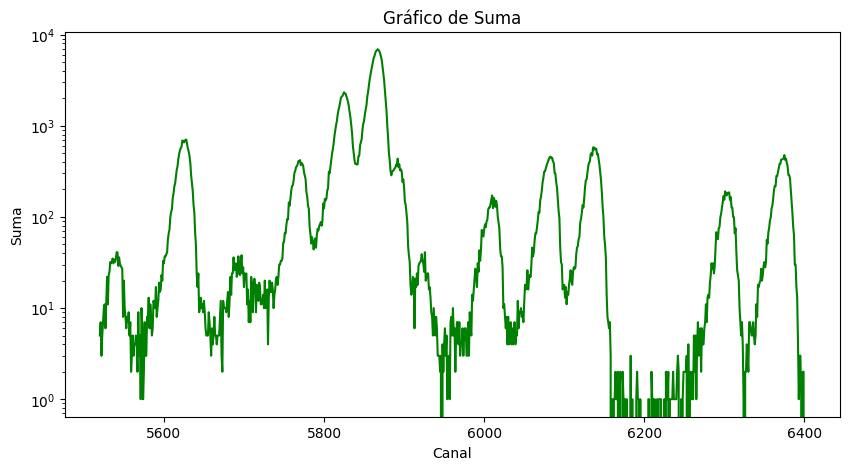

In [90]:
# Seleccionar las columnas HR01, HR02 y Suma
df_selected = df[['HR01', 'HR02', 'Suma']]

# Definir el rango deseado en el eje X
inicio = 5520
fin = 6400

# Filtrar el DataFrame para incluir solo las filas dentro del rango
df_selected = df_selected[(df_selected.index >= inicio) & (df_selected.index <= fin)]

# Graficar Suma en un eje X separado
plt.figure(figsize=(10, 5))
plt.plot(df_selected.index, df_selected['Suma'], color='green')
plt.xlabel('Canal')
plt.ylabel('Suma')
plt.title('Gráfico de Suma')
plt.yscale('log')

plt.show()

# U-235 Simulation Penhan

In [91]:
df_penhan = pd.read_csv('/content/chspect-U235.dat',
                   delim_whitespace=True,
                   skiprows=5, names=['Deposited Energy (eV)',
                          'Probability Density (1/(eV*particle))'])

In [92]:
df_penhan_U235 = df_penhan[(df_penhan['Deposited Energy (eV)'] >= 4.135E6) & (df_penhan['Deposited Energy (eV)'] <= 4.605E6)].copy()
df_penhan_U235.loc[:, 'Probability Density (1/(eV*particle))'] *= 0.95

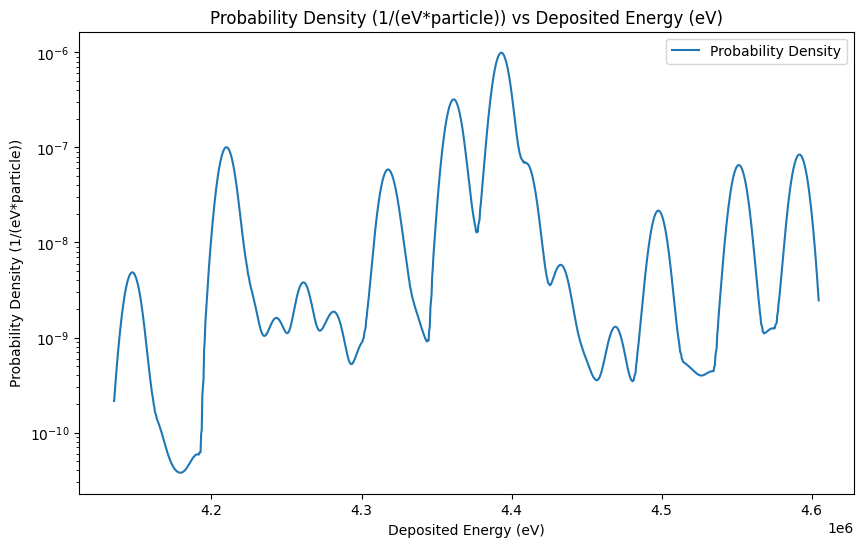

In [93]:
plt.figure(figsize=(10, 6))
plt.plot(df_penhan_U235['Deposited Energy (eV)'], df_penhan_U235['Probability Density (1/(eV*particle))'], label='Probability Density')
plt.xlabel('Deposited Energy (eV)')
plt.ylabel('Probability Density (1/(eV*particle))')
plt.title('Probability Density (1/(eV*particle))' + ' vs Deposited Energy (eV)')
plt.yscale('log')
plt.legend()
plt.show()

# U-234 Simulation Penhan

In [94]:
df_penhan = pd.read_csv('/content/chspect-U234.dat',
                   delim_whitespace=True,
                   skiprows=5, names=['Deposited Energy (eV)',
                          'Probability Density (1/(eV*particle))'])

In [95]:
df_penhan_U234 = df_penhan[(df_penhan['Deposited Energy (eV)'] >= 4.7E6) & (df_penhan['Deposited Energy (eV)'] <= 4.787E6)].copy()
df_penhan_U234.loc[:, 'Probability Density (1/(eV*particle))'] *= 0.05

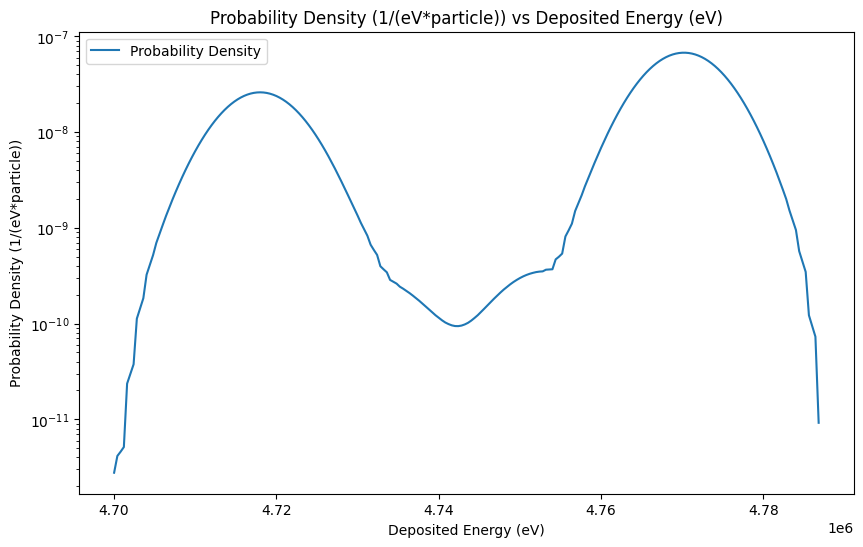

In [96]:
plt.figure(figsize=(10, 6))
plt.plot(df_penhan_U234['Deposited Energy (eV)'], df_penhan_U234['Probability Density (1/(eV*particle))'], label='Probability Density')
plt.xlabel('Deposited Energy (eV)')
plt.ylabel('Probability Density (1/(eV*particle))')
plt.title('Probability Density (1/(eV*particle))' + ' vs Deposited Energy (eV)')
plt.yscale('log')
plt.legend()
plt.show()

# Merge U-235 and U-234

In [97]:
df_penhan_concat = pd.concat([df_penhan_U234, df_penhan_U235], ignore_index=True)

In [98]:
df_penhan= df_penhan_concat[df_penhan_concat['Probability Density (1/(eV*particle))'] >= 1.0E-10].copy()

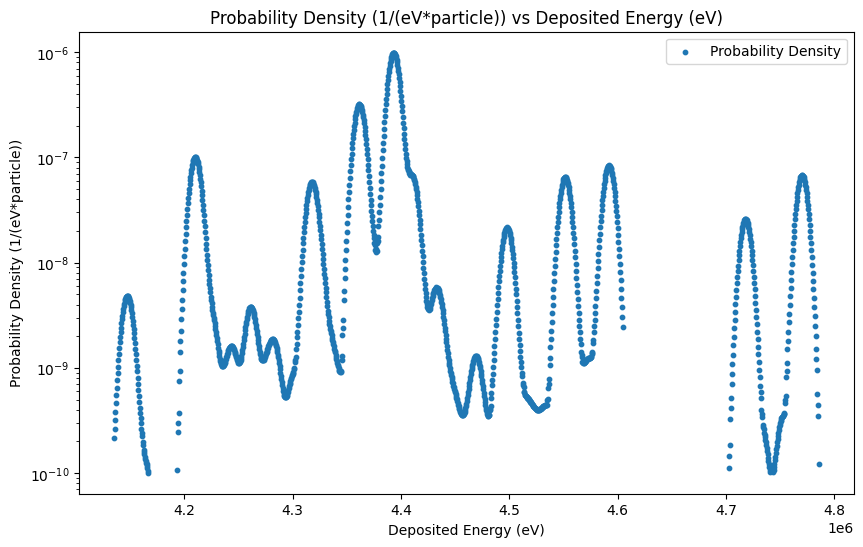

In [99]:
plt.figure(figsize=(10, 6))
plt.scatter(df_penhan['Deposited Energy (eV)'], df_penhan['Probability Density (1/(eV*particle))'], label='Probability Density', s=10)
plt.xlabel('Deposited Energy (eV)')
plt.ylabel('Probability Density (1/(eV*particle))')
plt.title('Probability Density (1/(eV*particle))' + ' vs Deposited Energy (eV)')
plt.yscale('log')
plt.legend()
plt.show()

# Linear regresion for U-235

## Axis X

In [100]:
df_selected_U235 = df_selected[df_selected.index < 6155].copy()

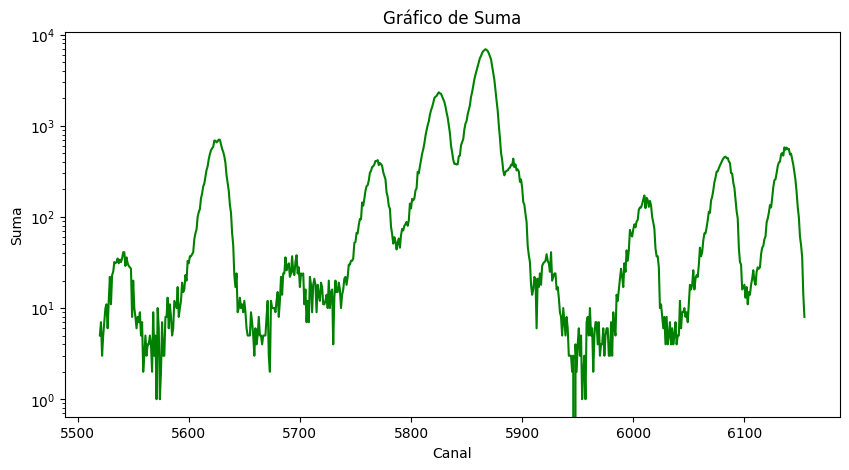

In [101]:
# Graficar Suma en un eje X separado
plt.figure(figsize=(10, 5))
plt.plot(df_selected_U235.index, df_selected_U235['Suma'], color='green')
plt.xlabel('Canal')
plt.ylabel('Suma')
plt.title('Gráfico de Suma')
plt.yscale('log')
plt.show()

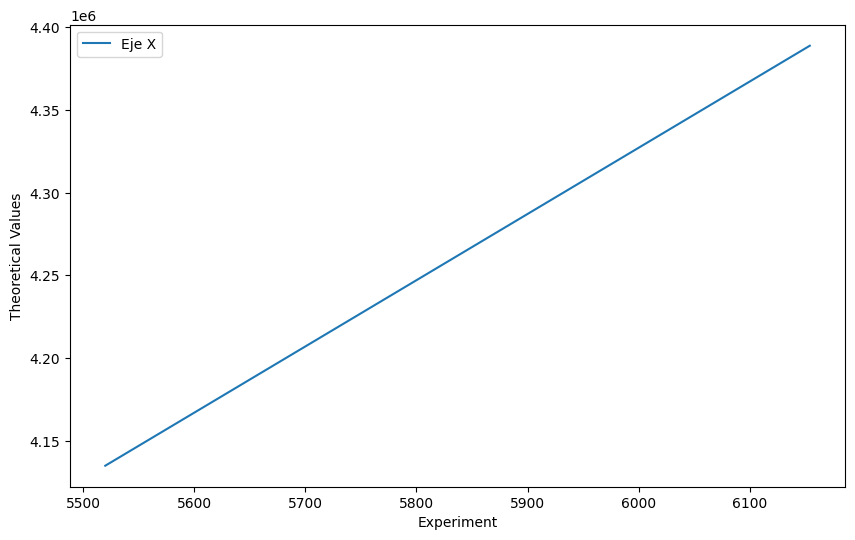

In [102]:
import numpy as np

plt.figure(figsize=(10, 6))
plt.plot(np.sort(df_selected_U235.index), np.sort(df_penhan_U235['Deposited Energy (eV)'].values[:len(df_selected_U235.index)]), label='Eje X')
plt.xlabel('Experiment')
plt.ylabel('Theoretical Values')
plt.legend()
plt.show()

In [103]:
# Realizar la regresión lineal
slope, intercept = np.polyfit(np.sort(df_selected_U235.index), np.sort(df_penhan_U235['Deposited Energy (eV)'].values[:len(df_selected_U235.index)]), 1)

# Crear la recta de regresión
x = np.sort(df_selected_U235.index)
df_selected_U235['Index Predicted'] = intercept + slope * x

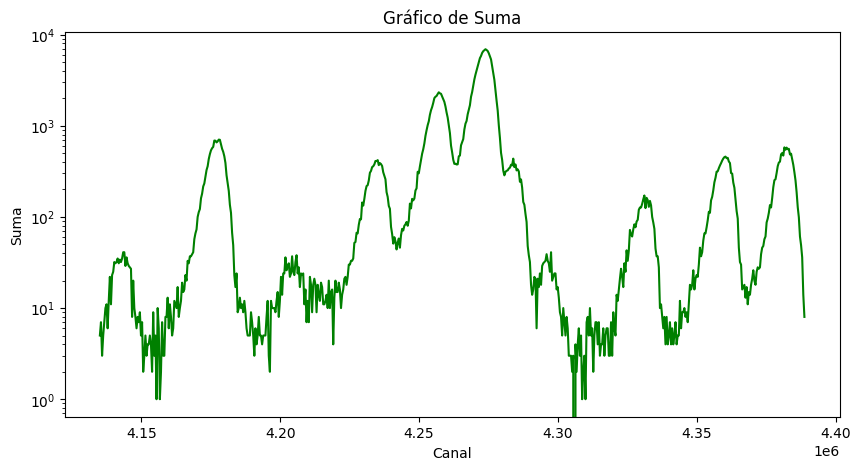

In [107]:
# Graficar Suma en un eje X separado
plt.figure(figsize=(10, 5))
plt.plot(df_selected_U235['Index Predicted'], df_selected_U235['Suma'], color='green')
plt.xlabel('Canal')
plt.ylabel('Suma')
plt.title('Gráfico de Suma')
plt.yscale('log')
plt.show()

## Axis Y

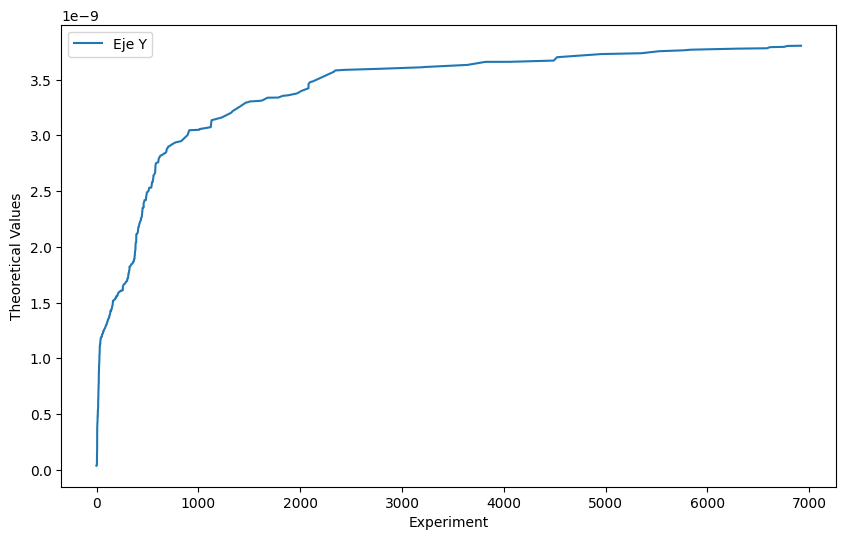

In [112]:
import numpy as np

plt.figure(figsize=(10, 6))
plt.plot(np.sort(df_selected_U235['Suma']), np.sort(df_penhan_U235['Probability Density (1/(eV*particle))'].values)[:len(df_selected_U235['Suma'])], label='Eje Y')
plt.xlabel('Experiment')
plt.ylabel('Theoretical Values')
plt.legend()
plt.show()

In [109]:
# Realizar la regresión lineal
slope, intercept, r_value, p_value, std_err = stats.linregress(np.sort(df_selected_U235['Suma']), np.sort(df_penhan_U235['Probability Density (1/(eV*particle))'].values[:len(df_selected_U235['Suma'])]))

# Usar la pendiente y la intersección para calcular los valores ajustados de y
df_selected_U235['Probability Predicted'] = intercept + slope * df_selected_U235['Suma']

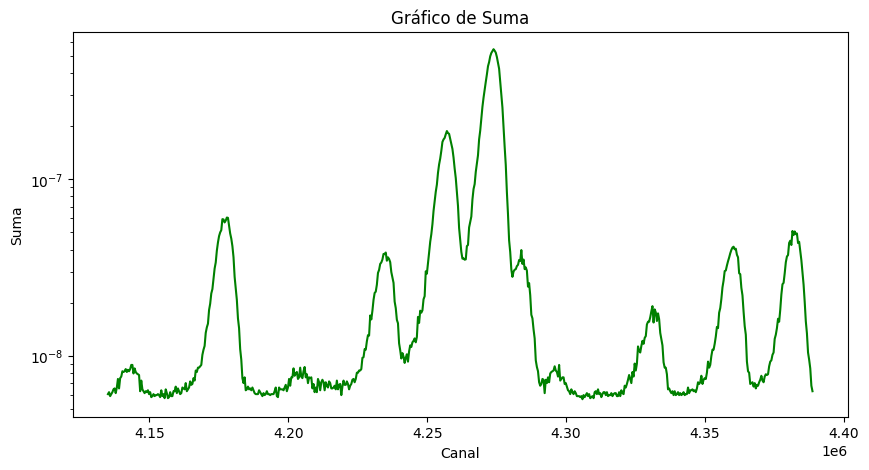

In [110]:
# Graficar Suma en un eje X separado
plt.figure(figsize=(10, 5))
plt.plot(df_selected_U235['Index Predicted'], df_selected_U235['Probability Predicted'], color='green')
plt.xlabel('Canal')
plt.ylabel('Suma')
plt.title('Gráfico de Suma')
plt.yscale('log')
plt.show()

# All together

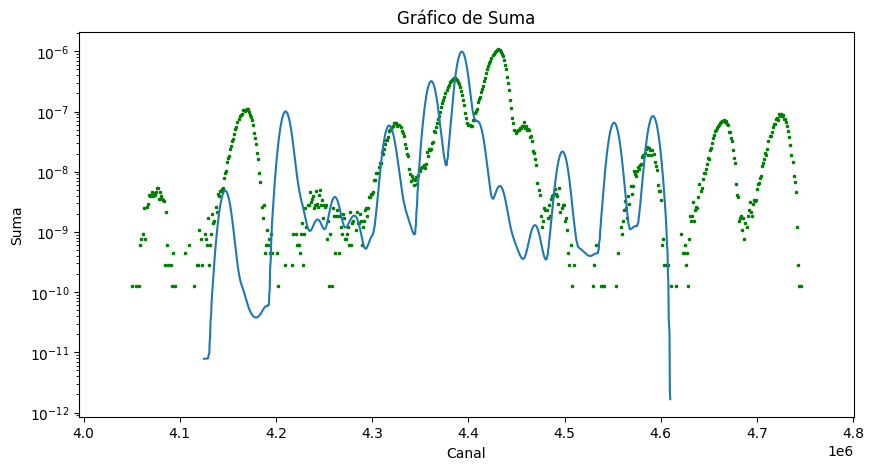

In [35]:
# Graficar Suma en un eje X separado
plt.figure(figsize=(10, 5))
plt.scatter(df_selected_U235['Index Predicted'], df_selected_U235['Probability Predicted'], s= 3, marker ='x', color='green')
plt.plot(df_penhan_U235['Deposited Energy (eV)'], df_penhan_U235['Probability Density (1/(eV*particle))'], label='Probability Density')
plt.xlabel('Canal')
plt.ylabel('Suma')
plt.title('Gráfico de Suma')
plt.yscale('log')
plt.show()